In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [18]:
customers=pd.read_csv(r"D:\Zeotap\Dataset\Customers.csv")
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [19]:
# EDA - Basic data inspection
print("Customers DataFrame Info:")
print(customers.info())

Customers DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [20]:
products=pd.read_csv(r"D:\Zeotap\Dataset\Products.csv")
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [21]:
print("\nProducts DataFrame Info:")
print(products.info())


Products DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None


In [22]:
transactions=pd.read_csv(r"D:\Zeotap\Dataset\Transactions.csv")
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [23]:
print("\nTransactions DataFrame Info:")
print(transactions.info())


Transactions DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None


In [24]:
# Convert date columns to datetime
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# EDA

# 1. Customer Distribution by Region


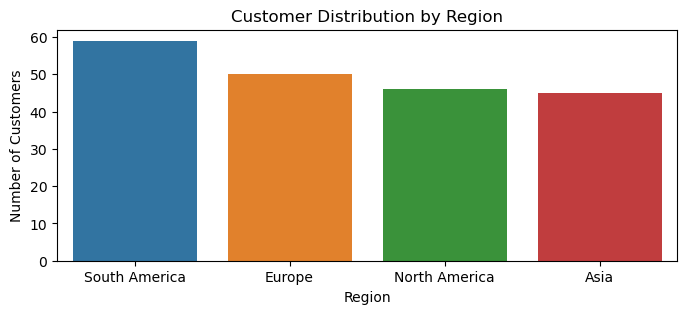

In [70]:
region_counts = customers['Region'].value_counts()
plt.figure(figsize=(8, 3))
sns.barplot(x=region_counts.index, y=region_counts.values)
plt.title('Customer Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.show()

## Regional Sales Focus: The majority of customers are from South America. Marketing should focus on this region for higher ROI


# 2. Product Popularity by Category


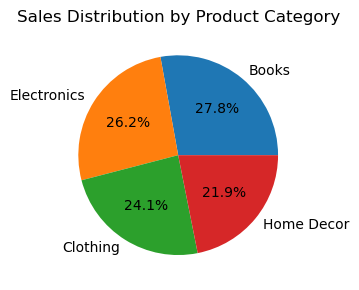

In [71]:
merged = pd.merge(transactions, products, on='ProductID')
category_sales = merged.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 3))
category_sales.plot(kind='pie', autopct='%1.1f%%')
plt.title('Sales Distribution by Product Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

### Category Performance: Books and Electronics leads in sales volume, suggesting a strong market (54%) for this categories. Consider expanding related product lines.


# 3. Time Series Analysis of Transactions


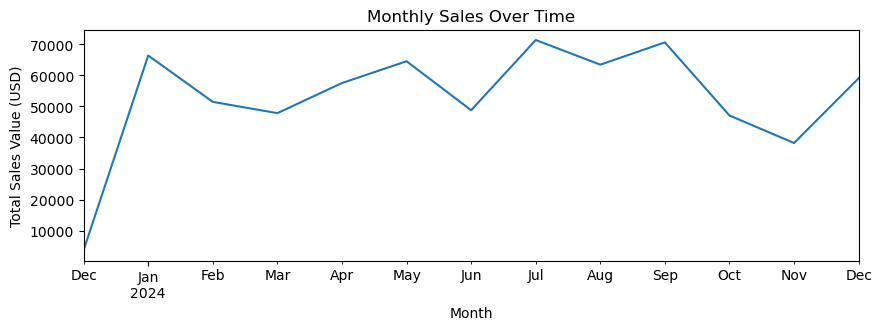

In [64]:
transactions['YearMonth'] = transactions['TransactionDate'].dt.to_period('M')
monthly_sales = transactions.groupby('YearMonth')['TotalValue'].sum()
plt.figure(figsize=(10, 3))
monthly_sales.plot()
plt.title('Monthly Sales Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales Value (USD)')
plt.show()

 ### Sales Trends: Sales peak during July, August and September, indicating seasonal buying trends. Plan inventory and promotions around these peaks.


# 4. Customer Retention Analysis


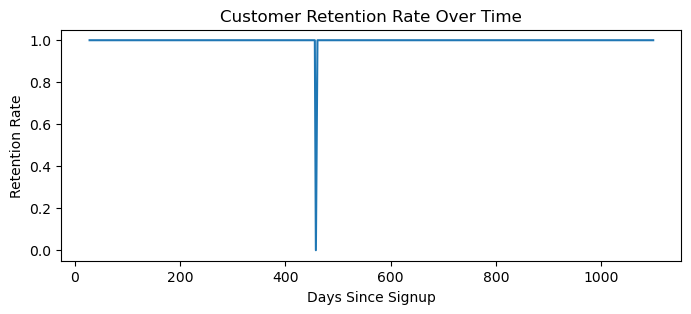

In [67]:
customers['DaysSinceSignup'] = (datetime.now() - customers['SignupDate']).dt.days
customers['HasPurchased'] = customers['CustomerID'].isin(transactions['CustomerID'].unique())
retention = customers.groupby('DaysSinceSignup')['HasPurchased'].mean()
plt.figure(figsize=(8, 3))
retention.plot()
plt.title('Customer Retention Rate Over Time')
plt.xlabel('Days Since Signup')
plt.ylabel('Retention Rate')
plt.show()

### Customer Retention: A sharp drop in the retention rate to nearly 0 occurs around day 400. This suggests that at this point, there was a significant event or issue that caused a majority (or all) of the customers to churn.


# 5. Price Distribution of Products Sold


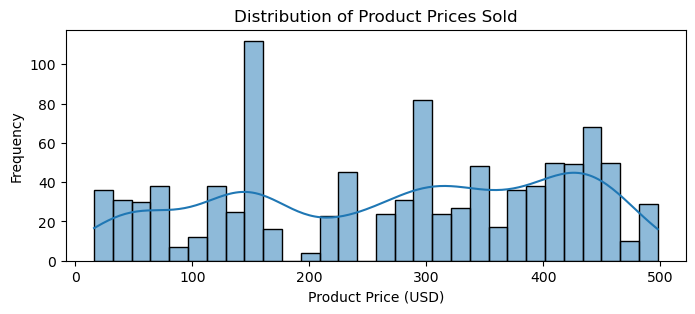

In [65]:
plt.figure(figsize=(8, 3))
sns.histplot(merged['Price_x'], kde=True, bins=30)
plt.title('Distribution of Product Prices Sold')
plt.xlabel('Product Price (USD)')
plt.ylabel('Frequency')
plt.show()


### Products in the 200 USD range may not be appealing to customers. Investigate whether this is due to a lack of offerings, low demand, or competition.